# Final Project #

## Preliminaries ##

In [1]:
# Load libraries

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import re
import math

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [2]:
# Load data

df_contract = pd.read_csv('/datasets/final_provider/contract.csv', parse_dates=['BeginDate'])
df_personal = pd.read_csv('/datasets/final_provider/personal.csv')
df_internet = pd.read_csv('/datasets/final_provider/internet.csv')
df_phone = pd.read_csv('/datasets/final_provider/phone.csv')

The purpose of this project is to build a machine learning model to help the telecom operator Interconnect predict future client churn from various streams of user data. I will explore the data, make a work plan, train and test models, and explain my conclusions.

## Examine the Data ##

In [3]:
# Examine the df_contract, df_personal, df_internet, and df_phone dataframes

dfs = {'df_contract': df_contract, 'df_personal': df_personal, 'df_internet': df_internet, 'df_phone': df_phone}

for name, df in dfs.items():
    print(name)
    print()
    display(df.info())
    display(df)
    print()

df_contract

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   object        
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 440.3+ KB


None

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65
...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,No,One year,Yes,Mailed check,84.80,1990.5
7039,2234-XADUH,2014-02-01,No,One year,Yes,Credit card (automatic),103.20,7362.9
7040,4801-JZAZL,2019-03-01,No,Month-to-month,Yes,Electronic check,29.60,346.45
7041,8361-LTMKD,2019-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Mailed check,74.40,306.6



df_personal

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


None

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No
...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes
7039,2234-XADUH,Female,0,Yes,Yes
7040,4801-JZAZL,Female,0,Yes,Yes
7041,8361-LTMKD,Male,1,Yes,No



df_internet

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


None

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...
5512,6840-RESVB,DSL,Yes,No,Yes,Yes,Yes,Yes
5513,2234-XADUH,Fiber optic,No,Yes,Yes,No,Yes,Yes
5514,4801-JZAZL,DSL,Yes,No,No,No,No,No
5515,8361-LTMKD,Fiber optic,No,No,No,No,No,No



df_phone

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


None

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes
...,...,...
6356,2569-WGERO,No
6357,6840-RESVB,Yes
6358,2234-XADUH,Yes
6359,8361-LTMKD,Yes


In [4]:
# Explore the TotalCharges column

bad_values = df_contract['TotalCharges'][pd.to_numeric(df_contract['TotalCharges'], errors='coerce').isna()].unique()
bad_counts = df_contract['TotalCharges'].value_counts().loc[bad_values]
bad_rows = df_contract[df_contract['TotalCharges'] == ' ']

print('The number of string values in TotalCharges not convertible to float:', bad_counts.sum())
print('The bad values:', bad_values)
print('Rows with bad values:')
display(bad_rows)

The number of string values in TotalCharges not convertible to float: 11
The bad values: [' ']
Rows with bad values:


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
488,4472-LVYGI,2020-02-01,No,Two year,Yes,Bank transfer (automatic),52.55,
753,3115-CZMZD,2020-02-01,No,Two year,No,Mailed check,20.25,
936,5709-LVOEQ,2020-02-01,No,Two year,No,Mailed check,80.85,
1082,4367-NUYAO,2020-02-01,No,Two year,No,Mailed check,25.75,
1340,1371-DWPAZ,2020-02-01,No,Two year,No,Credit card (automatic),56.05,
3331,7644-OMVMY,2020-02-01,No,Two year,No,Mailed check,19.85,
3826,3213-VVOLG,2020-02-01,No,Two year,No,Mailed check,25.35,
4380,2520-SGTTA,2020-02-01,No,Two year,No,Mailed check,20.00,
5218,2923-ARZLG,2020-02-01,No,One year,Yes,Mailed check,19.70,
6670,4075-WKNIU,2020-02-01,No,Two year,No,Mailed check,73.35,


In [5]:
# Change the TotalCharges column data type to float

df_contract['TotalCharges'] = pd.to_numeric(df_contract['TotalCharges'], errors='coerce')
df_contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   object        
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7032 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 440.3+ KB


In [6]:
# Create a function to plot column distributions

def plots(df, column):
    display(df[column].describe())
    if df[column].dtype == 'O':
        counts = df[column].value_counts()
        plt.bar(counts.index, counts.values) 
        plt.xlabel('Categories')
        plt.ylabel('Number of Observations')
        plt.title(f"Bar Plot for {column}")
        plt.xticks(rotation=90)
        plt.show()
    else:
        unique_values = np.sort(df[column].unique())
        if (len(unique_values) < 100): 
            bins = np.append(unique_values, unique_values[-1] + 1) 
        else: 
            bins = 100

        plt.hist(df[column], bins=bins)
        plt.xlabel(column)
        plt.ylabel('Number of Observations')
        plt.title(f'Histogram for {column}')
        plt.show()

df_contract:BeginDate


count                    7043
unique                     77
top       2014-02-01 00:00:00
freq                      366
first     2013-10-01 00:00:00
last      2020-02-01 00:00:00
Name: BeginDate, dtype: object

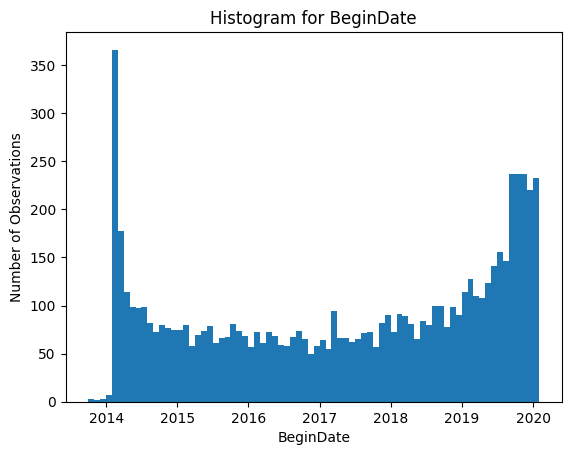

df_contract:EndDate


count     7043
unique       5
top         No
freq      5174
Name: EndDate, dtype: object

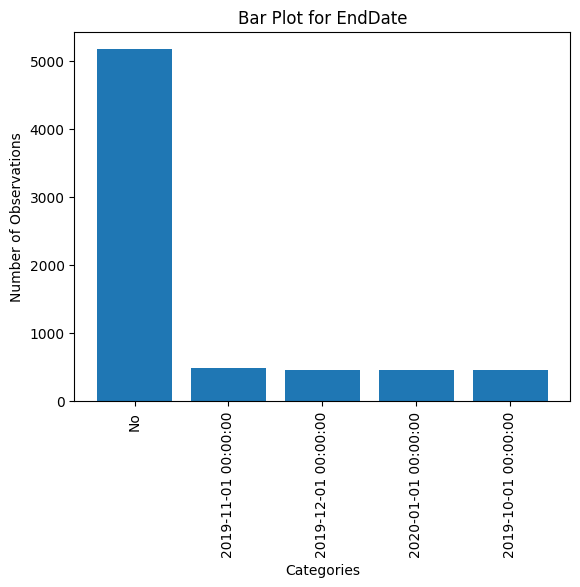

df_contract:Type


count               7043
unique                 3
top       Month-to-month
freq                3875
Name: Type, dtype: object

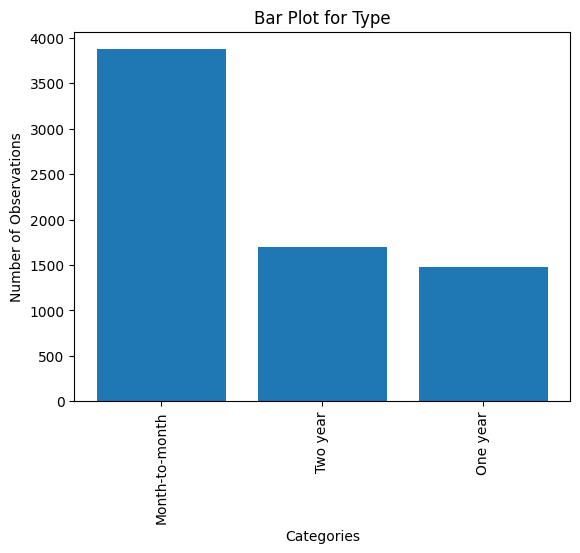

df_contract:PaperlessBilling


count     7043
unique       2
top        Yes
freq      4171
Name: PaperlessBilling, dtype: object

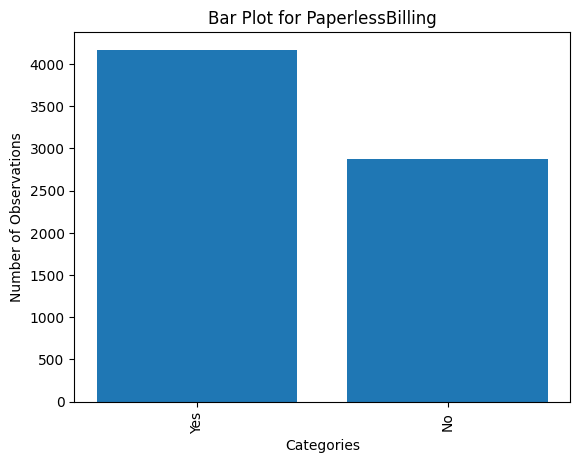

df_contract:PaymentMethod


count                 7043
unique                   4
top       Electronic check
freq                  2365
Name: PaymentMethod, dtype: object

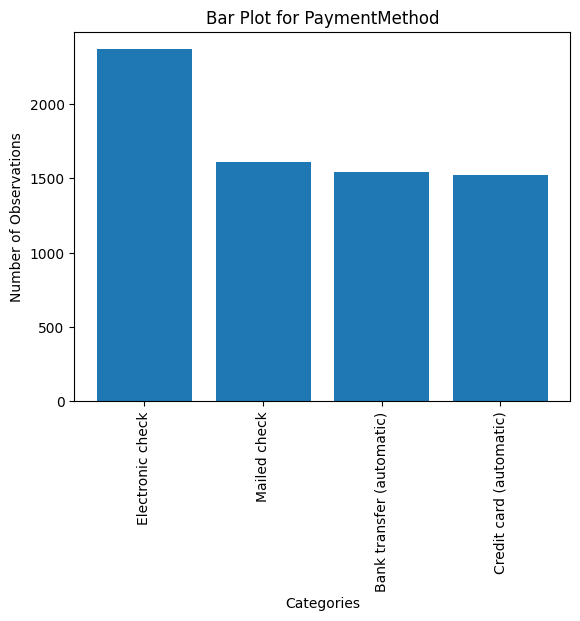

df_contract:MonthlyCharges


count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

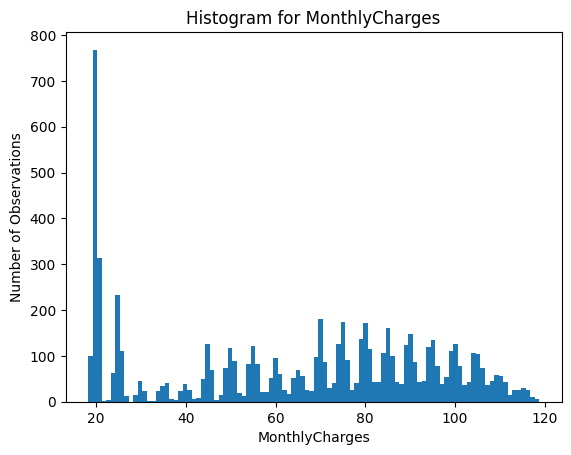

df_contract:TotalCharges


count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

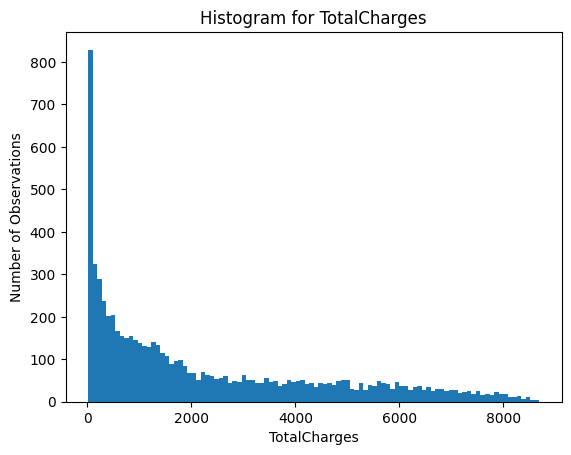

df_personal:gender


count     7043
unique       2
top       Male
freq      3555
Name: gender, dtype: object

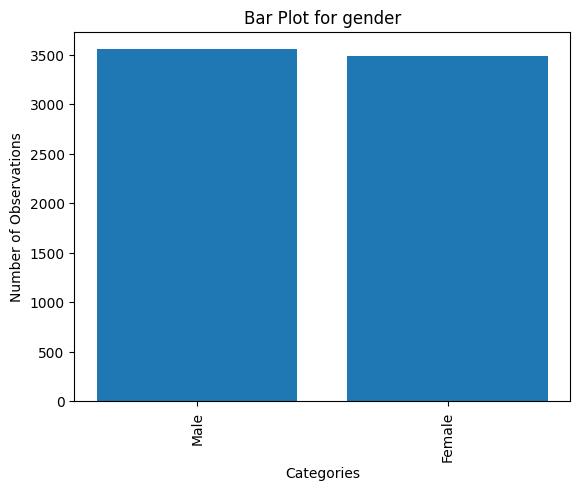

df_personal:SeniorCitizen


count    7043.000000
mean        0.162147
std         0.368612
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: SeniorCitizen, dtype: float64

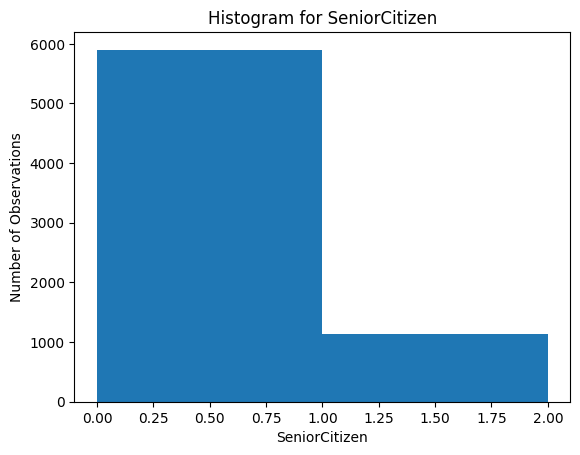

df_personal:Partner


count     7043
unique       2
top         No
freq      3641
Name: Partner, dtype: object

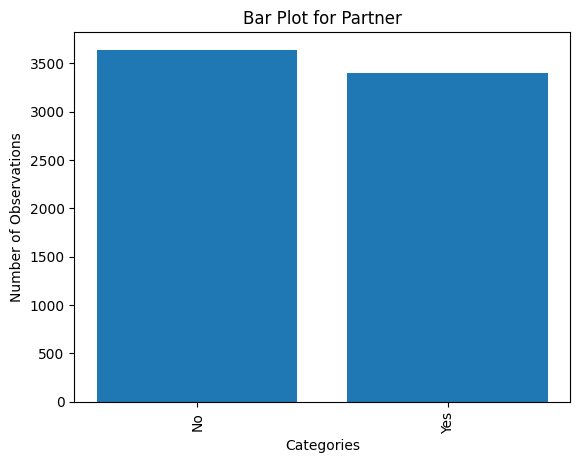

df_personal:Dependents


count     7043
unique       2
top         No
freq      4933
Name: Dependents, dtype: object

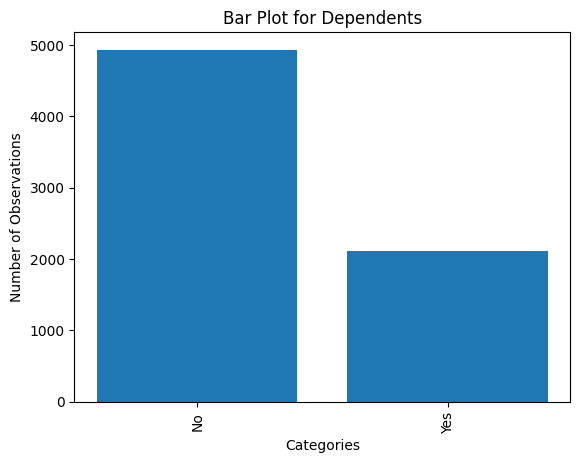

df_internet:InternetService


count            5517
unique              2
top       Fiber optic
freq             3096
Name: InternetService, dtype: object

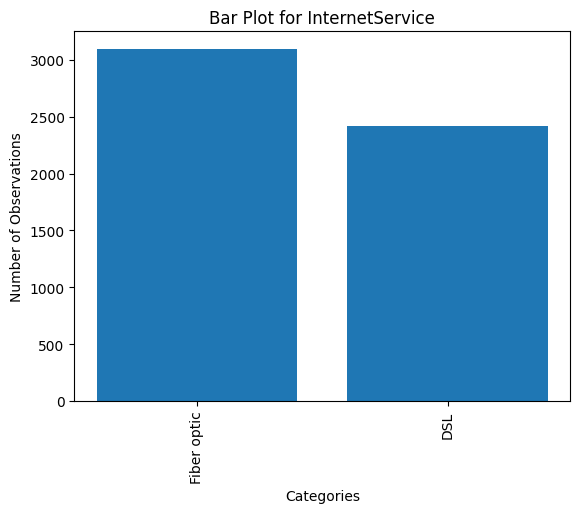

df_internet:OnlineSecurity


count     5517
unique       2
top         No
freq      3498
Name: OnlineSecurity, dtype: object

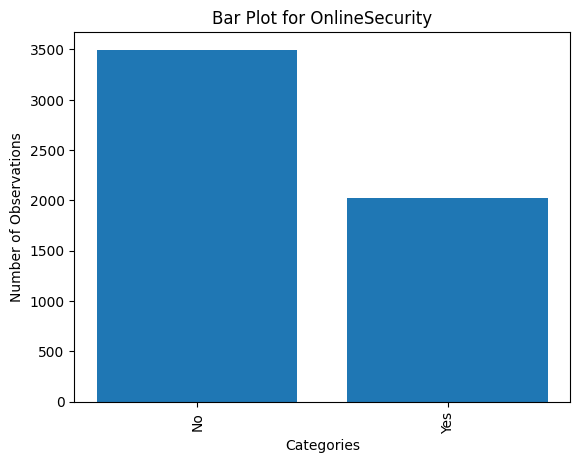

df_internet:OnlineBackup


count     5517
unique       2
top         No
freq      3088
Name: OnlineBackup, dtype: object

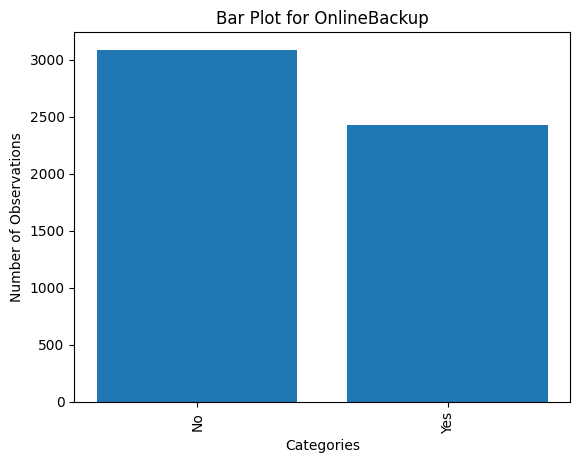

df_internet:DeviceProtection


count     5517
unique       2
top         No
freq      3095
Name: DeviceProtection, dtype: object

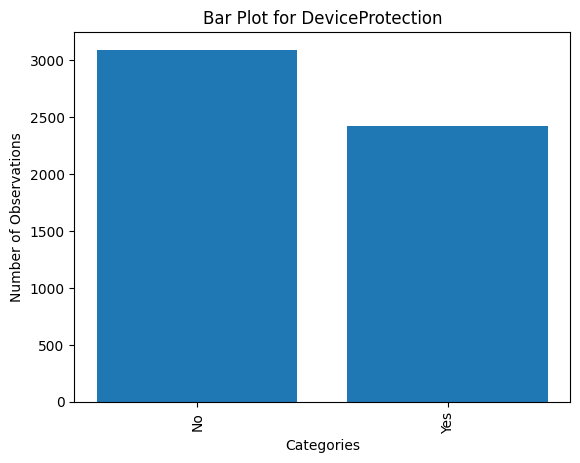

df_internet:TechSupport


count     5517
unique       2
top         No
freq      3473
Name: TechSupport, dtype: object

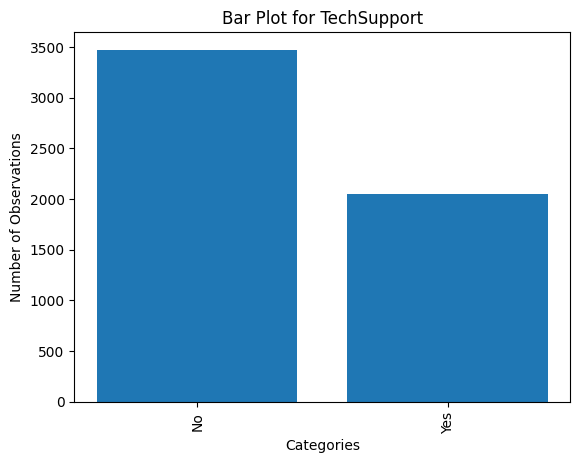

df_internet:StreamingTV


count     5517
unique       2
top         No
freq      2810
Name: StreamingTV, dtype: object

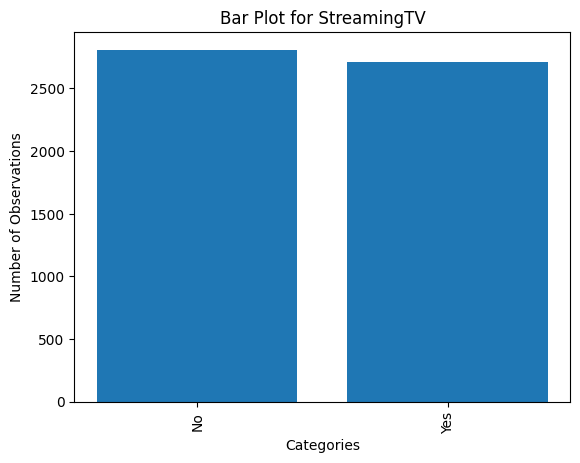

df_internet:StreamingMovies


count     5517
unique       2
top         No
freq      2785
Name: StreamingMovies, dtype: object

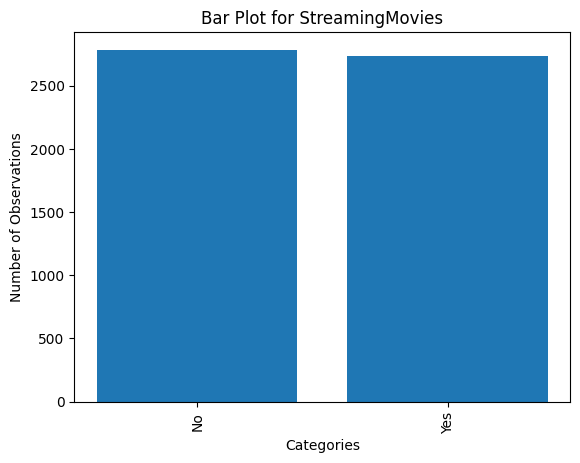

df_phone:MultipleLines


count     6361
unique       2
top         No
freq      3390
Name: MultipleLines, dtype: object

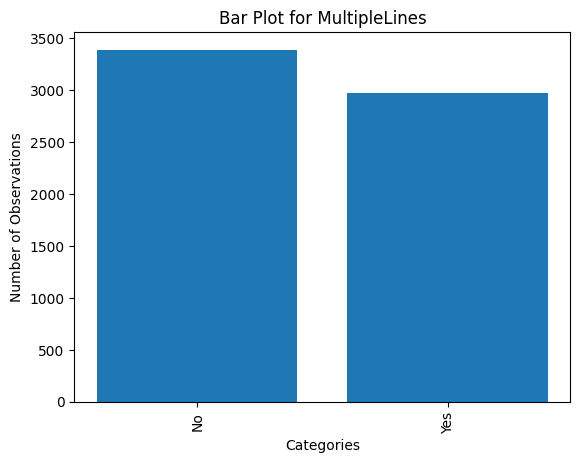

In [7]:
# Plot each column in each dataframe (except for customerID)

for name, df in dfs.items():
    for col in df.columns:
        if col == 'customerID': continue
        print(f"{name}:{col}")
        plots(df, col)

In [8]:
# Check the number of categories for each column

for name, df in dfs.items():
    for col in df.columns:
        print(f"{name}[{col}]: {len(df[col].unique())} unique values")
    print()

df_contract[customerID]: 7043 unique values
df_contract[BeginDate]: 77 unique values
df_contract[EndDate]: 5 unique values
df_contract[Type]: 3 unique values
df_contract[PaperlessBilling]: 2 unique values
df_contract[PaymentMethod]: 4 unique values
df_contract[MonthlyCharges]: 1585 unique values
df_contract[TotalCharges]: 6531 unique values

df_personal[customerID]: 7043 unique values
df_personal[gender]: 2 unique values
df_personal[SeniorCitizen]: 2 unique values
df_personal[Partner]: 2 unique values
df_personal[Dependents]: 2 unique values

df_internet[customerID]: 5517 unique values
df_internet[InternetService]: 2 unique values
df_internet[OnlineSecurity]: 2 unique values
df_internet[OnlineBackup]: 2 unique values
df_internet[DeviceProtection]: 2 unique values
df_internet[TechSupport]: 2 unique values
df_internet[StreamingTV]: 2 unique values
df_internet[StreamingMovies]: 2 unique values

df_phone[customerID]: 6361 unique values
df_phone[MultipleLines]: 2 unique values



In [9]:
# Check that all relevant customerIDs are in the df_contract dataframe

ids = {}
for name, df in dfs.items():
    ids[name] = set(df['customerID'])
    if name != 'df_contract':
        missing = len(set(ids[name]) - set(ids['df_contract']))
        print(f"Number of customerIDs found in {name} but not df_contract = {missing}")

Number of customerIDs found in df_personal but not df_contract = 0
Number of customerIDs found in df_internet but not df_contract = 0
Number of customerIDs found in df_phone but not df_contract = 0


In [10]:
# Check for duplicate customerIDs

for name, df in dfs.items():
    print(f"{name}: {df['customerID'].duplicated().sum()} duplicated customerIDs")

df_contract: 0 duplicated customerIDs
df_personal: 0 duplicated customerIDs
df_internet: 0 duplicated customerIDs
df_phone: 0 duplicated customerIDs


### Analysis ###
The data look good overall. I read the files as separate dataframes to be merged later on the shared customerID primary key. I will need to change the column names to snake_case.

The df_contract dataframe had seven columns in addition to the customerID primary key. I parsed BeginDate as datetime data when loading it and converted TotalCharges to float64 so that I could better explore them. TotalCharges had 11 non-numeric values (" ") that were converted to NaN values and will need to be addressed before modeling. I will fill them with the column median to account for the rest of the distribution's pronounced right skew. MonthlyCharges and TotalCharges both contained continuous values, Type and PaymentMethod contained categorical values (with 3 and 4 categories, respectively), and PaperlessBilling contained binary values. The categorical data will need to be One Hot Encoded, and the continuous data will need to be scaled after splitting training and testing datasets (to avoid leakage). BeginDate will not be directly useful for modeling, so I will need to construct features from it. I will compute contract duration as of 2/1/2020 (the most recent date) and explore the utility of other features (e.g., month, season).

EndDate, the target feature, was an unusual column. Most of its values (73%) were the string "No," but the remainder were roughly equally split among four dates (10/1/2019, 11/1/2019, 12/1/2019, and 1/1/2020). Because the purpose of the project is to classify which customers have churned, the target feature should contain binary data. I will need to convert the "No" strings to 0 and the date values to 1. The dates can be safely discarded because they provide no useful information about the outcome of interest. With more granular EndDate data, it might be possible to predict time until churn, but this dataset is not suitable for that, and it is not the purpose of this project.

The other three dataframes contained columns with binary data in addition to the customerID primary keys. The df_personal dataframe had gender, SeniorCitizen, Partner, and Dependents columns; the df_internet dataframe had InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, and StreamingMovies; and the df_phone dataframe had MultipleLines. The 13 binary columns across dataframes contained a variety of values (0/1, Yes/No, Male/Female, DSL/Fiber optic), but they will all need to be converted to 0/1.

None of the original dataframes contained missing values (except for the 11 introduced when converting TotalCharges), but the different sizes of the dataframes (7,043, 7,043, 5,517, and 6,361 observations) will produce many when they are merged. At least 7 columns will be missing at least 1,500 values, representing more than 20% of the observations. The data are not missing at random. As I interpret the instructions, customers without entries in the df_internet and df_phone dataframes probably do not have internet or phone service, respectively, through Interconnect. There may be other reasons for missing entries, but that seems like a reasonable assumption. As such, missing values can be filled with 0. No imputation will be necessary and, in fact, it would be imposing data that probably never existed. The df_contract dataframe contained all relevant primary keys, so no observations will need to be dropped for the absence of the target feature. None of the dataframes had duplicate primary keys, so no observations will need to be reconciled.

The data in the various columns were well-behaved and suitable for modeling. BeginDate had a bimodal u-shaped distribution with peaks at the very beginning (2014) and end (late 2019 into 2020). There was a spike of sign-ups near the system launch or the first major onboarding event followed by a sharp drop and then a gradual decline until 2017, when new contracts gradually increased until a marked surge lasting several months before data acquisition ceased. That makes sense for a growing business. MonthlyCharges looked like a mixture of roughly normal distributions at 20 price points, presumably representing different service configurations. TotalCharges was much more continuous and extremely right-skewed, resembling an exponential distribution. Both MonthlyCharges and TotalCharges featured large spikes at their lowest values (around 20 and 0, respectively). That probably reflects a popular basic plan and a large number of recent (and as yet uncharged) customers. The remaining columns were categorical with reasonable class balances. The most extreme imbalances were SeniorCitizen with 84% of values being 0 and EndDate with 73% being "No," but the modal value was around 70% or less for the rest.

The class imbalance for the target feature derived from EndDate is large but not insurmountable at 73%. The AUC-ROC primary metric is reasonably robust to class imbalance, but something should be done to address the issue. While downsampling would lose too much data, upsampling can introduce distortions and overfit on synthetic data. A better strategy is to use the class_weight='balanced' hyperparameter to penalize minority-class errors within the model algorithms. It is a clean solution that works natively for all the models I intend to use.

I intend to try at least three different models. Logistic regression will be a good baseline, a random forest classifier will capture nonlinear interactions, and a gradient boosting model will learn more efficiently from errors. There are several options for gradient boosting models, but LGBMClassifier seems like an appropriate choice for this project because it is fast and flexible. If tuning various hyperparameters fails to produce adequate results, I might consider alternative models or specifications.

## Proposed Work Plan ##

1. Already completed:
    - Parsed BeginDate as datetime64 data
    - Converted TotalCharges to float64 


2. Merge dataframes and fill missing data:
    - Merge dataframes on the shared customerID primary key
    - Fill missing values with 0 in columns formerly from the df_internet and df_phone dataframes
    - Fill 11 NaNs in TotalCharges with the column median 


3. Convert and feature engineer date columns:
    - Convert EndDate to binary data with 0/1 format
    - Create contract duration feature from BeginDate
    - Explore the value of other features derived from BeginDate
    - Drop the original BeginDate and EndDate


4. Convert and preprocess additional columns:
    - Change the column names to snake_case
    - Convert PaperlessBilling, gender, Partner, Dependents, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, and MultipleLines to 0/1 format
    - One Hot Encode Type and PaymentMethod
    - Scale MonthlyCharges and TotalCharges (after splitting training and testing datasets)


5. Build and test models:
    - Split data into training and testing datasets
    - Train several models:
        - Logistic Regression
        - Random Forest Classifier
        - LGBMClassifier
        - Others if necessary
    - Implement class_weight='balanced' or equivalent (e.g., is_unbalance=True) for all models to compensate for class imbalance
    - Tune model hyperparameters to optimize performance
    - Test the best model specifications against the test data and select the best one based on AUC-ROC scores
    - Write final conclusions
    
    
- **Clarifying Questions:**
    - Is it fair to assume that customers missing from the internet or phone data files do not subscribe to that service from Interconnect?
    - What is the "Student Guidance Team" and what role does it play in this project? Is this a collaborative process, or should I proceed independently as in previous projects?
    - What do the "story points" mean? Is there any advantage to scoring more than five points beyond bragging rights?

## Preprocessing and Feature Engineering ##

In [11]:
# Merge the df_contract, df_personal, df_internet, and df_phone dataframes

df_merged = df_contract.merge(df_personal, on='customerID', how='left').merge(df_internet, on='customerID', how='left').merge(df_phone, on='customerID', how='left')

display(df_merged.info())
df_merged

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   object        
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7032 non-null   float64       
 8   gender            7043 non-null   object        
 9   SeniorCitizen     7043 non-null   int64         
 10  Partner           7043 non-null   object        
 11  Dependents        7043 non-null   object        
 12  InternetService   5517 non-null   object        
 13  OnlineSecurity    5517 non-null   object        
 14  OnlineBackup      5517 n

None

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,NaN
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.50,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,NaN
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,No,One year,Yes,Mailed check,84.80,1990.50,Male,0,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,Yes
7039,2234-XADUH,2014-02-01,No,One year,Yes,Credit card (automatic),103.20,7362.90,Female,0,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Yes
7040,4801-JZAZL,2019-03-01,No,Month-to-month,Yes,Electronic check,29.60,346.45,Female,0,Yes,Yes,DSL,Yes,No,No,No,No,No,NaN
7041,8361-LTMKD,2019-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Mailed check,74.40,306.60,Male,1,Yes,No,Fiber optic,No,No,No,No,No,No,Yes


In [12]:
# Convert column names to snake_case

df_merged.columns = [re.sub(r'([a-z])([A-Z])', r'\1_\2', col).lower() for col in df_merged.columns]

df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7043 non-null   object        
 1   begin_date         7043 non-null   datetime64[ns]
 2   end_date           7043 non-null   object        
 3   type               7043 non-null   object        
 4   paperless_billing  7043 non-null   object        
 5   payment_method     7043 non-null   object        
 6   monthly_charges    7043 non-null   float64       
 7   total_charges      7032 non-null   float64       
 8   gender             7043 non-null   object        
 9   senior_citizen     7043 non-null   int64         
 10  partner            7043 non-null   object        
 11  dependents         7043 non-null   object        
 12  internet_service   5517 non-null   object        
 13  online_security    5517 non-null   object        
 14  online_b

In [13]:
# Fill missing values in total_charges with the median and all other missing values with 'No'

df_merged['total_charges'] = df_merged['total_charges'].fillna(df_merged['total_charges'].median())
df_merged = df_merged.fillna('No')

df_merged.isna().sum()

customer_id          0
begin_date           0
end_date             0
type                 0
paperless_billing    0
payment_method       0
monthly_charges      0
total_charges        0
gender               0
senior_citizen       0
partner              0
dependents           0
internet_service     0
online_security      0
online_backup        0
device_protection    0
tech_support         0
streaming_tv         0
streaming_movies     0
multiple_lines       0
dtype: int64

In [14]:
# Check binary categorical features

bin_cols = []
for col in df_merged.columns:
    if df_merged[col].nunique() == 2 and df_merged[col].dtype == 'object':
        bin_cols.append(col)
        print(f"Unique values in {col} column: {df_merged[col].unique()}")

Unique values in paperless_billing column: ['Yes' 'No']
Unique values in gender column: ['Female' 'Male']
Unique values in partner column: ['Yes' 'No']
Unique values in dependents column: ['No' 'Yes']
Unique values in online_security column: ['No' 'Yes']
Unique values in online_backup column: ['Yes' 'No']
Unique values in device_protection column: ['No' 'Yes']
Unique values in tech_support column: ['No' 'Yes']
Unique values in streaming_tv column: ['No' 'Yes']
Unique values in streaming_movies column: ['No' 'Yes']
Unique values in multiple_lines column: ['No' 'Yes']


In [15]:
# Recode binary categorical features as 0/1

df_merged[bin_cols] = df_merged[bin_cols].replace({'Yes': 1, 'No': 0})
df_merged['gender'] = df_merged['gender'].replace({'Male': 1, 'Female': 0})

{col: df_merged[col].unique() for col in bin_cols}

{'paperless_billing': array([1, 0]),
 'gender': array([0, 1]),
 'partner': array([1, 0]),
 'dependents': array([0, 1]),
 'online_security': array([0, 1]),
 'online_backup': array([1, 0]),
 'device_protection': array([0, 1]),
 'tech_support': array([0, 1]),
 'streaming_tv': array([0, 1]),
 'streaming_movies': array([0, 1]),
 'multiple_lines': array([0, 1])}

In [16]:
# Check non-binary categorical features

cat_cols = []
for col in df_merged.columns:
    if 2 < df_merged[col].nunique() < 5:
        cat_cols.append(col)
        print(f"Unique values in {col} column: {df_merged[col].unique()}")

Unique values in type column: ['Month-to-month' 'One year' 'Two year']
Unique values in payment_method column: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Unique values in internet_service column: ['DSL' 'Fiber optic' 'No']


In [17]:
# One Hot Encode non-binary categorical features (and fix their column names)

df_merged = pd.get_dummies(df_merged, columns=cat_cols, drop_first=True)
df_merged.columns = [re.sub(r'[^a-zA-Z0-9]+', '_', col).lower().strip('_') for col in df_merged.columns]

df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   customer_id                           7043 non-null   object        
 1   begin_date                            7043 non-null   datetime64[ns]
 2   end_date                              7043 non-null   object        
 3   paperless_billing                     7043 non-null   int64         
 4   monthly_charges                       7043 non-null   float64       
 5   total_charges                         7043 non-null   float64       
 6   gender                                7043 non-null   int64         
 7   senior_citizen                        7043 non-null   int64         
 8   partner                               7043 non-null   int64         
 9   dependents                            7043 non-null   int64         
 10  

In [18]:
# Convert end_date to "churned" with binary data (0/1)

df_merged['churned'] = (df_merged['end_date'] != 'No').astype(int)

df_merged['churned'].describe()

count    7043.000000
mean        0.265370
std         0.441561
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: churned, dtype: float64

In [19]:
# Extract features from begin_date

df_merged['tenure_days'] = (df_merged['begin_date'].max() - df_merged['begin_date']).dt.days
df_merged['year'] = df_merged['begin_date'].dt.year
df_merged['quarter'] = df_merged['begin_date'].dt.quarter
df_merged['month'] = df_merged['begin_date'].dt.month
df_merged['day'] = df_merged['begin_date'].dt.day

df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 30 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   customer_id                           7043 non-null   object        
 1   begin_date                            7043 non-null   datetime64[ns]
 2   end_date                              7043 non-null   object        
 3   paperless_billing                     7043 non-null   int64         
 4   monthly_charges                       7043 non-null   float64       
 5   total_charges                         7043 non-null   float64       
 6   gender                                7043 non-null   int64         
 7   senior_citizen                        7043 non-null   int64         
 8   partner                               7043 non-null   int64         
 9   dependents                            7043 non-null   int64         
 10  

In [20]:
# Assess predictive power by correlating features with the target

df_merged.select_dtypes(include='number').corr()['churned'].sort_values()

tenure_days                            -0.311715
type_two_year                          -0.302253
internet_service_no                    -0.227890
total_charges                          -0.199037
type_one_year                          -0.177820
online_security                        -0.171226
tech_support                           -0.164674
dependents                             -0.164221
partner                                -0.150448
payment_method_credit_card_automatic   -0.134302
payment_method_mailed_check            -0.091683
online_backup                          -0.082255
device_protection                      -0.066160
gender                                 -0.008612
multiple_lines                          0.040102
streaming_movies                        0.061382
streaming_tv                            0.063228
senior_citizen                          0.150889
quarter                                 0.174754
month                                   0.181417
paperless_billing   

Text(0, 0.5, 'Churned')

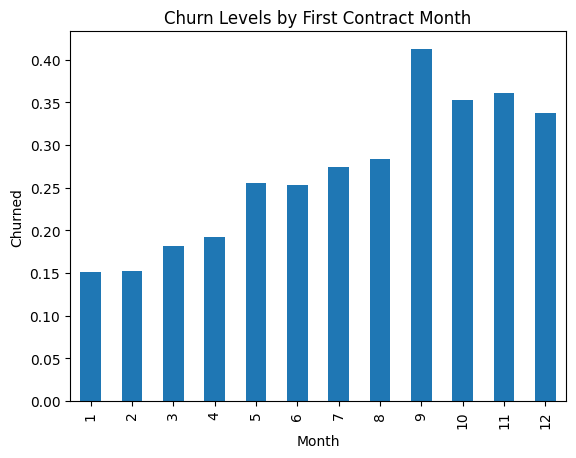

In [21]:
# Plot churned by month

df_merged.groupby('month')['churned'].mean().plot(kind='bar')
plt.title("Churn Levels by First Contract Month")
plt.xlabel("Month")
plt.ylabel("Churned")

Contracts always begin on the first of the month, so days are not useful. Tenure_days, year, month, and quarter all have predictive power, but I cannot include all of them. Year and quarter are effectively just less granular versions of tenure_days and month, respectively. To avoid redundancy and potential multicollinearity problems for logistic regression, I need to choose one from each pair. Simple correlations with the target feature (churned) indicated stronger associations for tenure_days (r = -0.31) over year (r = 0.29) and for month (r = 0.18) over quarter (r = 0.17). Tenure_days and month are the better choices because they offer more information and are more highly correlated with the target. Since month is ordinal data that relates roughly linearly to the target, I think it makes sense to use it as a numerical feature instead of encoding it as categorical. I will scale both tenure_days and month along with the other categorical features.

In [22]:
# Drop unneeded date features

df_merged = df_merged.drop(['end_date', 'begin_date', 'year', 'quarter', 'day'], axis=1)

df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   customer_id                           7043 non-null   object 
 1   paperless_billing                     7043 non-null   int64  
 2   monthly_charges                       7043 non-null   float64
 3   total_charges                         7043 non-null   float64
 4   gender                                7043 non-null   int64  
 5   senior_citizen                        7043 non-null   int64  
 6   partner                               7043 non-null   int64  
 7   dependents                            7043 non-null   int64  
 8   online_security                       7043 non-null   int64  
 9   online_backup                         7043 non-null   int64  
 10  device_protection                     7043 non-null   int64  
 11  tech_support     

In [23]:
# Split the data into training and testing sets 

features = df_merged.drop(['customer_id', 'churned'], axis=1).copy()
target = df_merged['churned'].copy()

features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=.25, stratify=target, random_state=12345)

print(f"Training set size: {len(features_train)}, {100*len(features_train)/len(features):.0f}%")
print(f"Test set size: {len(features_test)}, {100*len(features_test)/len(features):.0f}%")

Training set size: 5282, 75%
Test set size: 1761, 25%


In [24]:
# Scale continuous features

features_train = features_train.copy()
features_test = features_test.copy()
cont_cols = ['monthly_charges', 'total_charges', 'tenure_days', 'month']
scaler = StandardScaler()

scaler.fit(features_train[cont_cols])
features_train[cont_cols] = scaler.transform(features_train[cont_cols])
features_test[cont_cols] = scaler.transform(features_test[cont_cols])

display(features_train)
display(features_test)

,paperless_billing,monthly_charges,total_charges,gender,senior_citizen,partner,dependents,online_security,online_backup,device_protection,...,multiple_lines,type_one_year,type_two_year,payment_method_credit_card_automatic,payment_method_electronic_check,payment_method_mailed_check,internet_service_fiber_optic,internet_service_no,tenure_days,month
2329,0,0.996569,1.401702,0,0,0,0,0,1,0,...,1,1,0,0,1,0,1,0,0.980482,-0.404711
3103,1,-1.500279,-1.007485,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,-1.250186,1.275637
1302,1,0.541993,0.546097,0,0,1,1,1,0,1,...,0,0,1,0,0,1,0,0,0.484175,-0.404711
4364,1,0.518767,1.192327,0,0,0,0,1,1,1,...,1,0,1,1,0,0,0,0,1.225923,1.275637
134,0,-0.674080,-0.980164,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,-1.250186,1.275637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1247,0,0.613332,-0.117286,0,0,1,1,0,1,1,...,1,1,0,0,0,0,1,0,-0.385040,-1.244885
1506,1,-0.350568,0.661439,1,0,1,0,1,0,1,...,0,0,1,0,0,0,0,0,1.433396,-0.124653
1015,0,-0.365499,-0.708232,1,0,1,1,0,0,0,...,0,1,0,1,0,0,0,0,-0.755236,1.275637
622,1,0.676375,0.467427,1,0,1,1,0,0,1,...,0,1,0,0,1,0,1,0,0.276703,0.995579


,paperless_billing,monthly_charges,total_charges,gender,senior_citizen,partner,dependents,online_security,online_backup,device_protection,...,multiple_lines,type_one_year,type_two_year,payment_method_credit_card_automatic,payment_method_electronic_check,payment_method_mailed_check,internet_service_fiber_optic,internet_service_no,tenure_days,month
1814,0,-1.491984,-0.901869,1,0,1,1,0,0,0,...,0,0,1,0,0,1,0,1,-0.879990,-1.244885
1393,0,-1.470416,-1.007087,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,-1.332904,-1.524942
4728,0,-0.876482,-0.240055,1,0,0,0,1,0,1,...,0,0,1,0,0,1,0,0,0.524856,-0.684769
5734,1,0.820711,1.802946,1,0,1,1,1,1,1,...,1,0,1,0,0,1,0,0,1.596119,-1.244885
5009,0,1.696682,2.495087,1,0,1,0,1,1,1,...,1,1,0,0,0,0,1,0,1.350678,0.435463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6609,1,-1.478712,-1.007198,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,-1.208149,0.995579
533,1,1.409669,2.246476,1,1,1,1,0,0,1,...,1,1,0,1,0,0,1,0,1.433396,-0.124653
2271,1,0.892050,0.607990,0,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0.276703,0.995579
5878,0,-1.442213,-0.993073,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,1,-1.250186,1.275637


## Modeling ##

In [25]:
# Create a function to plot random hyperparameter search results

def plot_search(results, params):
    results_df = pd.DataFrame(results)
    results_df = results_df[[f"param_{x}" for x in params] + ['mean_test_score']]

    n_params = len(params)
    cols = 3
    rows = math.ceil(n_params / cols)
    plt.figure(figsize=(5 * cols, 4 * rows))

    for i, param in enumerate(params, start=1):
        plt.subplot(rows, cols, i)
        results_df.groupby(f"param_{param}")['mean_test_score'].mean().plot(marker='o')
        plt.xlabel(param)
        plt.ylabel("Average AUC-ROC")
        plt.title(f"Average AUC-ROC by {param}")

    plt.tight_layout()
    plt.show()
    
    return results_df.sort_values(by='mean_test_score', ascending=False).head(25)

In [26]:
# Train a logistic regression model

model = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')
scores = cross_val_score(model, features_train, target_train, scoring='roc_auc', cv=5)

print('Average Logistic Regression AUC-ROC score:', sum(scores) / len(scores))
print(scores)

Average Logistic Regression AUC-ROC score: 0.841002134445149
[0.82478354 0.86114576 0.83660714 0.84124172 0.84123251]


In [27]:
# Search hyperparameters to optimize random forest classifier performance

param_grid = {
    'n_estimators': [100, 250, 500, 1000],
    'max_depth': [10, 25, 50, 100],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['sqrt', 'log2', None]
}

model = RandomForestClassifier(random_state=12345, class_weight='balanced')
random_search = RandomizedSearchCV(model, param_grid, random_state=12345, n_iter=100, cv=5, scoring='roc_auc')
random_search.fit(features_train, target_train)

print('Random Forest Classifier Model Results')
print('Best Parameters:', random_search.best_params_)
print('Best Score (AUC-ROC):', random_search.best_score_)

Random Forest Classifier Model Results
Best Parameters: {'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 25}
Best Score (AUC-ROC): 0.9128894952934765


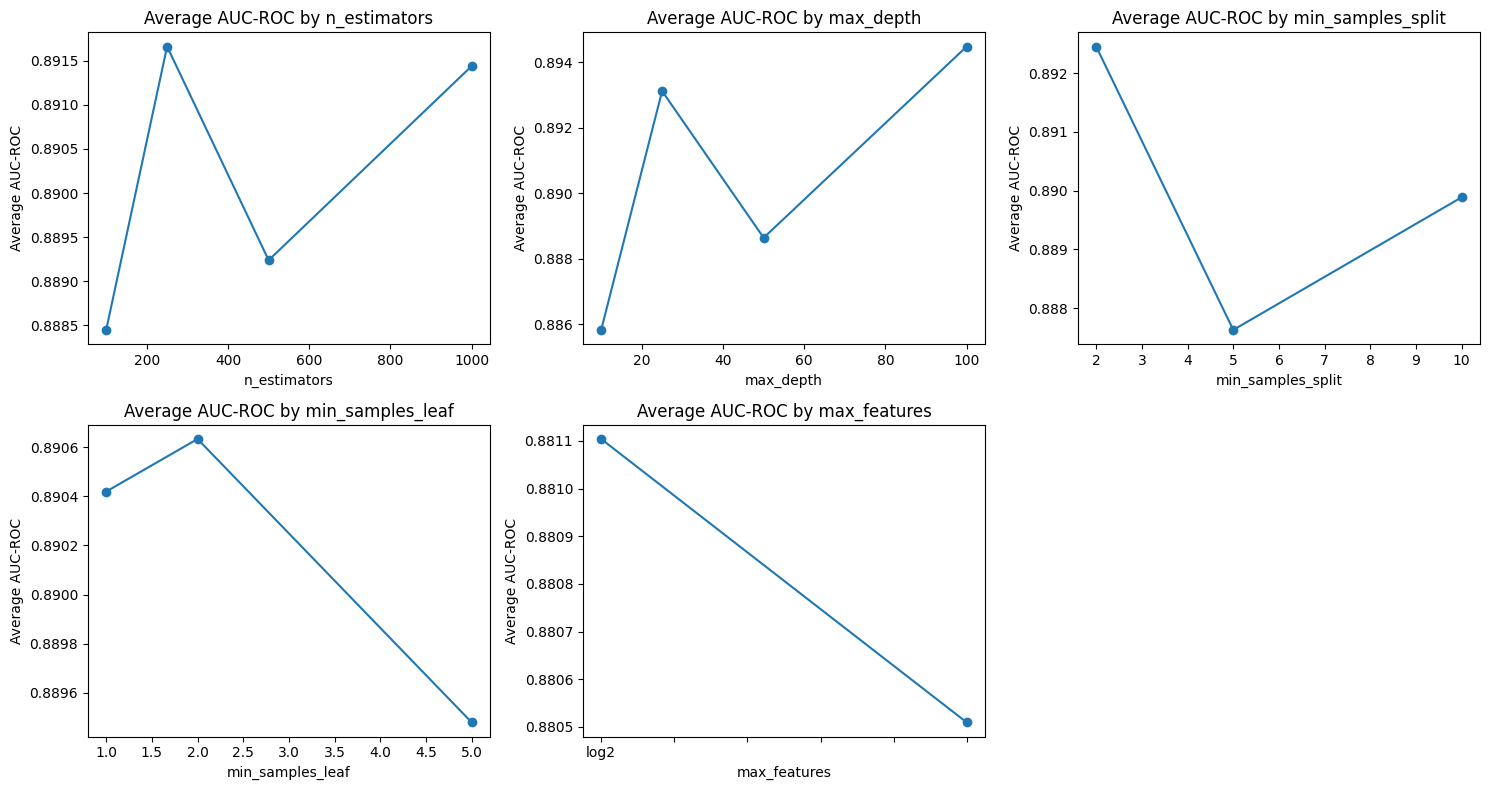

,param_n_estimators,param_max_depth,param_min_samples_split,param_min_samples_leaf,param_max_features,mean_test_score
94,1000,25,2,2,None,0.912889
92,1000,100,2,2,None,0.912868
67,250,100,2,2,None,0.912186
35,1000,100,5,1,None,0.911814
42,1000,50,5,1,None,0.911814
98,1000,25,2,1,None,0.911740
20,500,100,2,1,None,0.911464
83,250,50,2,1,None,0.910979
60,1000,25,10,2,None,0.910803
9,100,100,2,2,None,0.910682


In [28]:
# Plot the results of the hyperparameter search

plot_search(random_search.cv_results_, ['n_estimators', 'max_depth', 'min_samples_split', 'min_samples_leaf', 'max_features'])

In [29]:
# Search hyperparameters to optimize LGBMClassifier performance

param_dist = {
    'n_estimators': [1000, 3000, 5000],
    'max_depth': [10, 25, 30, 50],
    'learning_rate': [0.1, 0.25, 0.3, 0.4],
    'num_leaves': [2, 5, 10],
    'min_child_samples': [100, 300, 500],
}

model = LGBMClassifier(random_state=12345, class_weight='balanced')
random_search = RandomizedSearchCV(model, param_dist, random_state=12345, n_iter=100, cv=5, scoring='roc_auc')
random_search.fit(features_train, target_train)

print('LGBMClassifier Model Results')
print('Best Parameters:', random_search.best_params_)
print('Best Score (AUC-ROC):', random_search.best_score_)

LGBMClassifier Model Results
Best Parameters: {'num_leaves': 5, 'n_estimators': 3000, 'min_child_samples': 300, 'max_depth': 30, 'learning_rate': 0.25}
Best Score (AUC-ROC): 0.9489224753536444


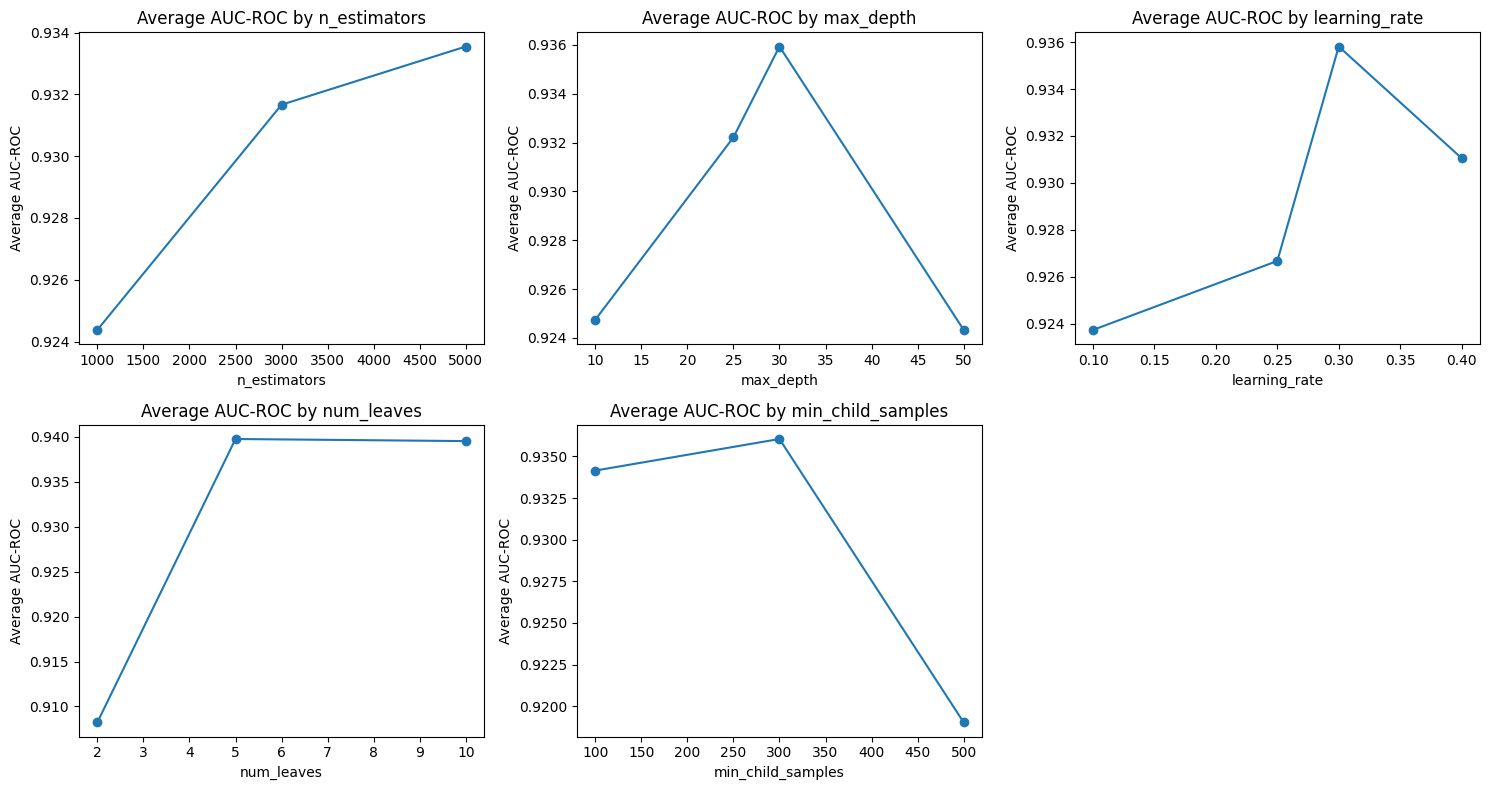

,param_n_estimators,param_max_depth,param_learning_rate,param_num_leaves,param_min_child_samples,mean_test_score
27,3000,30,0.25,5,300,0.948922
82,3000,10,0.3,5,300,0.948797
17,3000,50,0.3,5,300,0.948797
24,3000,30,0.3,5,300,0.948797
92,5000,50,0.4,2,100,0.948595
26,5000,50,0.1,5,300,0.948541
18,3000,50,0.4,5,300,0.947260
53,3000,30,0.4,5,300,0.947260
31,1000,25,0.3,5,300,0.946928
22,5000,30,0.3,5,300,0.946318


In [30]:
# Plot the results of the hyperparameter search

plot_search(random_search.cv_results_, ['n_estimators', 'max_depth', 'learning_rate', 'num_leaves', 'min_child_samples'])

I trained a logistic regression model as a baseline. The average AUC-ROC was 0.841 with cross-validation, a moderate performance. 

The random forest classifier model offered more room for hyperparameter tuning. I searched 100 permutations of five key hyperparameters over a range of values with RandomizedSearchCV. The best result had n_estimators = 1,000, max_depth = 25, min_samples_split = 2, min_samples_leaf = 2, max_features = None, and AUC-ROC = 0.913. Additional estimators would offer little benefit at the cost of greater complexity, and none of the best models had a feature limit. The best split minimum was at its minimum, and both max depth and leaf minimum were best in the middle of their explored ranges. Further tinkering might marginally improve performance, but probably not by much. This model performed very well. 

The LGBMClassifier is a gradient boosted decision tree ensemble. I used the same process as before to search 100 permutations of five key hyperparameters over a range of values. The best result had num_leaves = 5, n_estimators = 3,000, min_child_samples = 300, max_depth = 30, learning_rate = 0.25, and AUC-ROC = 0.949. Every best hyperparameter value was near the middle of its explored range, suggesting that neither higher nor lower values would greatly improve the model. Fine-tuning might marginally increase performance, but probably not by much. This was an extremely good model, far exceeding the project goal of AUC-ROC > 0.88. 

## Model Testing ##

In [31]:
# Test the logistic regression model against the test data

model = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')
model.fit(features_train, target_train)

lr_predictions = pd.Series(model.predict(features_test))
lr_probabilities = model.predict_proba(features_test)[:, 1]
lr_roc_auc = roc_auc_score(target_test, lr_probabilities)
lr_acc = accuracy_score(target_test, lr_predictions)

print('Logistic Regression Model Test Results')
print(f'Test AUC-ROC: {lr_roc_auc:.4f}')
print(f'Test Accuracy: {lr_acc:.4f}')

Logistic Regression Model Test Results
Test AUC-ROC: 0.8396
Test Accuracy: 0.7575


In [32]:
# Test the best random forest classifier model against the test data

model = RandomForestClassifier(
    class_weight='balanced',
    random_state=12345,
    n_estimators=1000,
    min_samples_split=2,
    min_samples_leaf=2,
    max_features=None,
    max_depth=25
)
model.fit(features_train, target_train)

rf_predictions = pd.Series(model.predict(features_test))
rf_probabilities = model.predict_proba(features_test)[:, 1]
rf_roc_auc = roc_auc_score(target_test, rf_probabilities)
rf_acc = accuracy_score(target_test, rf_predictions)

print('Random Forest Classifier Model Test Results')
print("Parameters: n_estimators = 1000, min_samples_split = 2, min_samples_leaf = 2, max_features = None, max_depth = 25")
print(f'Test AUC-ROC: {rf_roc_auc:.4f}')
print(f'Test Accuracy: {rf_acc:.4f}')

Random Forest Classifier Model Test Results
Parameters: n_estimators = 1000, min_samples_split = 2, min_samples_leaf = 2, max_features = None, max_depth = 25
Test AUC-ROC: 0.9134
Test Accuracy: 0.8773


In [33]:
# Test the best LGBMClassifier model against the test data

model = LGBMClassifier(
    class_weight='balanced',
    random_state=12345,
    num_leaves=5,
    n_estimators=3000,
    min_child_samples=300,
    max_depth=30,
    learning_rate=0.25
)
model.fit(features_train, target_train)

lgbm_predictions = pd.Series(model.predict(features_test))
lgbm_probabilities = model.predict_proba(features_test)[:, 1]
lgbm_roc_auc = roc_auc_score(target_test, lgbm_probabilities)
lgbm_acc = accuracy_score(target_test, lgbm_predictions)

print('LGBMClassifier Model Test Results')
print('Parameters: num_leaves = 5, n_estimators = 3000, min_child_samples = 300, max_depth = 30, learning_rate = 0.25')
print(f'Test AUC-ROC: {lgbm_roc_auc:.4f}')
print(f'Test Accuracy: {lgbm_acc:.4f}')

LGBMClassifier Model Test Results
Parameters: num_leaves = 5, n_estimators = 3000, min_child_samples = 300, max_depth = 30, learning_rate = 0.25
Test AUC-ROC: 0.9502
Test Accuracy: 0.9018


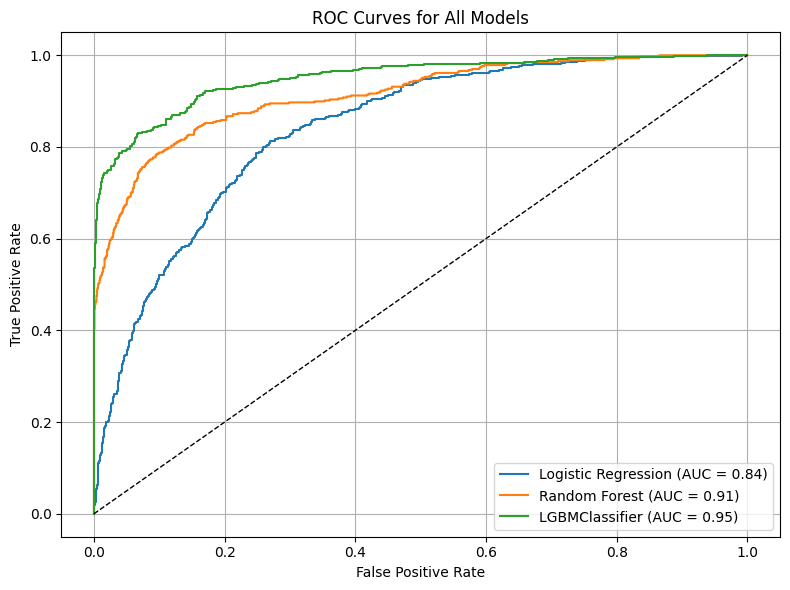

In [34]:
# Plot ROC curves for all three models

fpr_lr, tpr_lr, _ = roc_curve(target_test, lr_probabilities)
fpr_rf, tpr_rf, _ = roc_curve(target_test, rf_probabilities)
fpr_lgbm, tpr_lgbm, _ = roc_curve(target_test, lgbm_probabilities)

plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {lr_roc_auc:.2f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {rf_roc_auc:.2f})")
plt.plot(fpr_lgbm, tpr_lgbm, label=f"LGBMClassifier (AUC = {lgbm_roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', linewidth=1)

plt.title("ROC Curves for All Models")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

Testing the best models against the test data confirmed their relative performances during training. The logistic regression model was the worst overall (AUC-ROC = 0.840, accuracy = 0.758), followed by the random forest model (AUC-ROC = 0.913, accuracy = 0.877), and the LGBMClassifier model (AUC-ROC = 0.950, accuracy = 0.902). All three models were adequate for this project, but the random forest and LGBM models handily exceeded the top AUC-ROC threshold of 0.88.

The final LGBM model correctly predicted the target (churned) 90% of the time. It correctly ranked a randomly chosen churner above a randomly chosen non-churner 95% of the time. ROC curves clearly showed that, at every possible threshold, the LGBM model performed at least as well as the random forest model, which performed at least as well as the logistic regression model, which performed much better than chance. Any of these models would be useful for predicting churn, but the LGBM is undoubtedly the best. 

## Conclusions ##

This project set out to build a machine learning model for the telecom operator Interconnect to help them predict and prevent customer churn. 

The work plan I prepared was followed as expected without any significant difficulty. I loaded and merged four files containing data about customer contracts, personal information, internet services, and phone service. The data were relabeled, converted to appropriate file types, and properly formatted. Missing data were filled, useful features were extracted from dates (month and contract tenure), categorical features were one-hot encoded, and continuous features were scaled. After dropping extraneous columns, 23 features (4 continuous and 19 binary) remained in addition to one target: 1 for churned, 0 for not churned. All the features were suitable for modeling; none contained outliers, extreme distributions, or unreasonable class balances. To address the fairly large target class imbalance, with 73% having not churned, I used a primary metric robust to such imbalances (AUC-ROC) and requested compensatory internal class weights for each model with the class_weight='balanced' hyperparameter. 

I trained three models with cross-validation: logistic regression, random forest classifier, and gradient boosted decision tree (LGBMClassifier). The logistic regression was an adequate baseline model (AUC-ROC = 0.841). After tuning five hyperparameters each, scores for the random forest (AUC-ROC = 0.913) and LGBMClassifier (AUC-ROC = 0.949) models were very good. Testing on the hold-out test data confirmed the ranking and quality of the models: logistic regression (AUC-ROC = 0.840, accuracy = 0.758), then random forest (AUC-ROC = 0.913, accuracy = 0.877), and finally LGBMClassifier (AUC-ROC = 0.950, accuracy = 0.902). The latter two models far surpassed the project goal of AUC-ROC > 0.88. The final LGBMClassifier was the best model overall, correctly predicting whether someone churned 90% of the time, and is my recommended solution for Interconnect.

This model can help Interconnect with its goal of preventing churn by identifying customers who have not yet churned but were assigned high probabilities by the model. By offering promotions, discounts, or even just encouragement to ongoing customers who resemble past churners, Interconnect might be able to catch them before they churn. That is a defensible approach as long as the model is periodically retrained on updated data to remain accurate. However, there is a mismatch between this model and the true objective. The model predicts customers who have already churned, not those who are about to churn. A better approach would be to train a time series model based on monthly customer data and churn dates. That would allow Interconnect to actually forecast churning ahead of time based on behavioral patterns, not a single static profile. For example, churn might occur after three months of declining charges, a spike in support calls, or the end of a two-year contract. The model from this project cannot take those dynamic factors into account. A time series model would be more complex but worth exploring if the data is available. 